Training model with relu activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6724 - loss: 0.5937 - mae: 0.4131 - val_accuracy: 0.7947 - val_loss: 0.4640 - val_mae: 0.2975
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8031 - loss: 0.4535 - mae: 0.2921 - val_accuracy: 0.7993 - val_loss: 0.4423 - val_mae: 0.2837
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8203 - loss: 0.4125 - mae: 0.2671 - val_accuracy: 0.8147 - val_loss: 0.4238 - val_mae: 0.2720
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8180 - loss: 0.4165 - mae: 0.2699 - val_accuracy: 0.8387 - val_loss: 0.3959 - val_mae: 0.2560
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8408 - loss: 0.3911 - mae: 0.2498 - val_accuracy: 0.8420 - val_loss: 0.3726 - val_mae: 0.2399
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8487 - loss: 0.3676 - mae: 0.2317 - val_accuracy: 0.8453 - val_loss: 0.3630 - val_mae: 0.2314
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7702 - loss: 0.5484 - mae: 0.3917 - val_accuracy: 0.7867 - val_loss: 0.4774 - val_mae: 0.3104
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4570 - mae: 0.2991 - val_accuracy: 0.7947 - val_loss: 0.4458 - val_mae: 0.2899
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8061 - loss: 0.4276 - mae: 0.2768 - val_accuracy: 0.8113 - val_loss: 0.4272 - val_mae: 0.2836
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8062 - loss: 0.4269 - mae: 0.2784 - val_accuracy: 0.8187 - val_loss: 0.4100 - val_mae: 0.2647
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8283 - loss: 0.3984 - mae: 0.2581 - val_accuracy: 0.8400 - val_loss: 0.3923 - val_mae: 0.2563
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8399 - loss: 0.3831 - mae: 0.2481 - val_accuracy: 0.8473 - val_loss: 0.3776 - val_mae: 0.2462
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

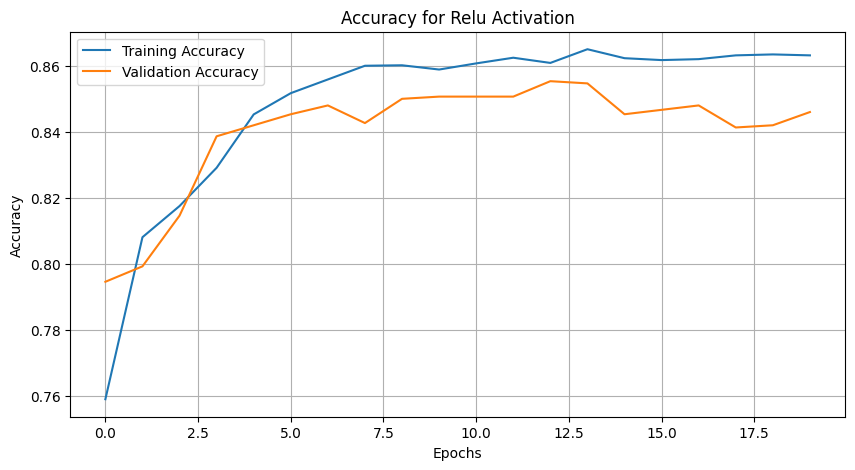

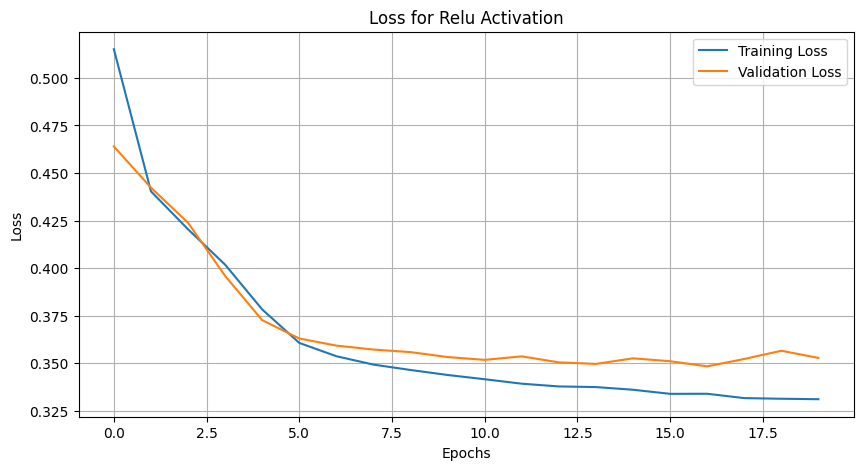

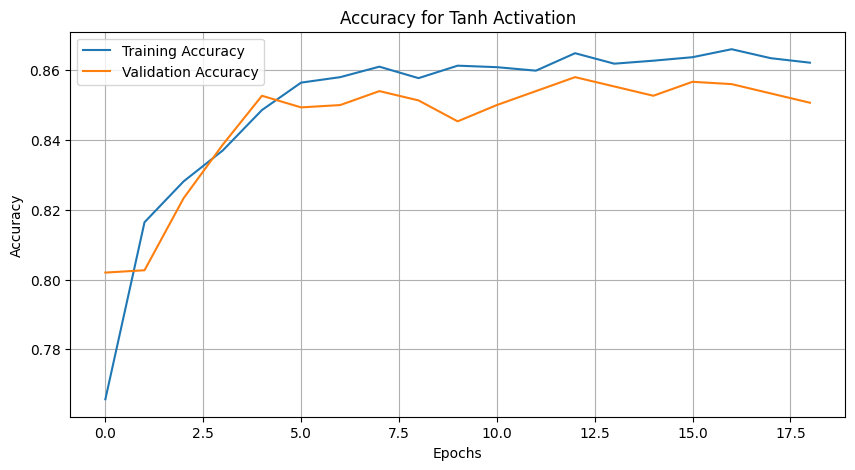

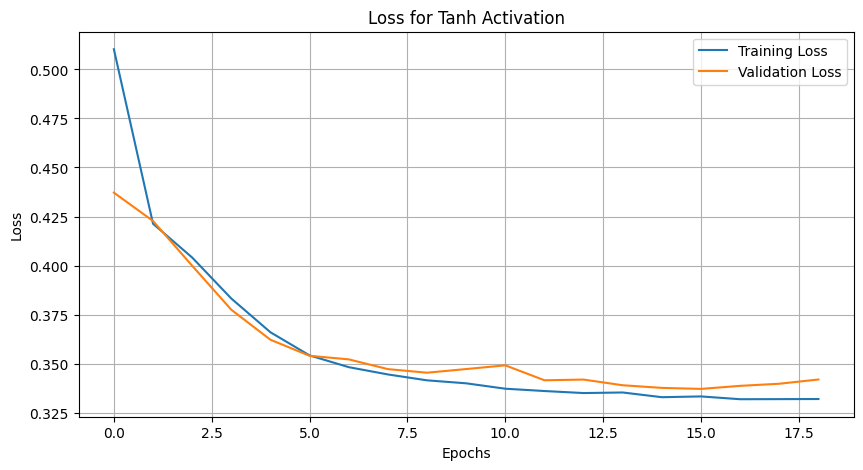

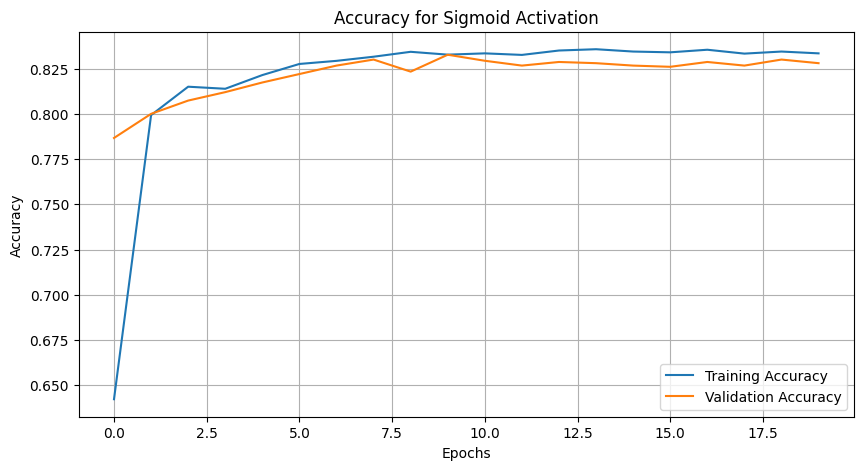

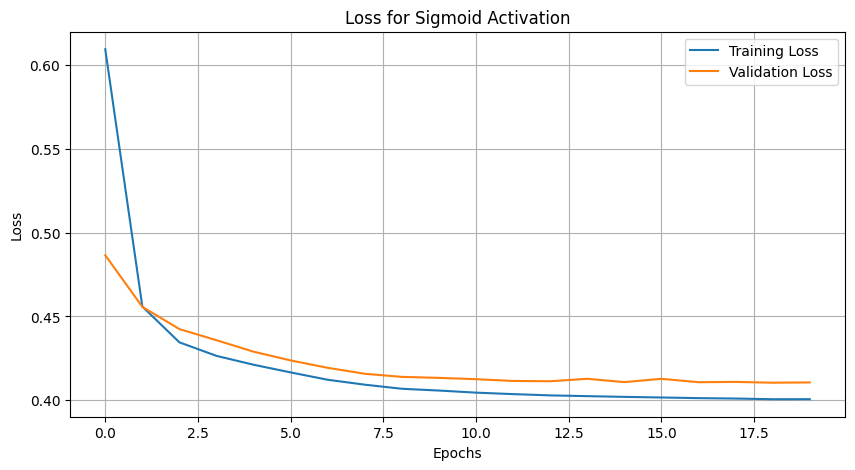

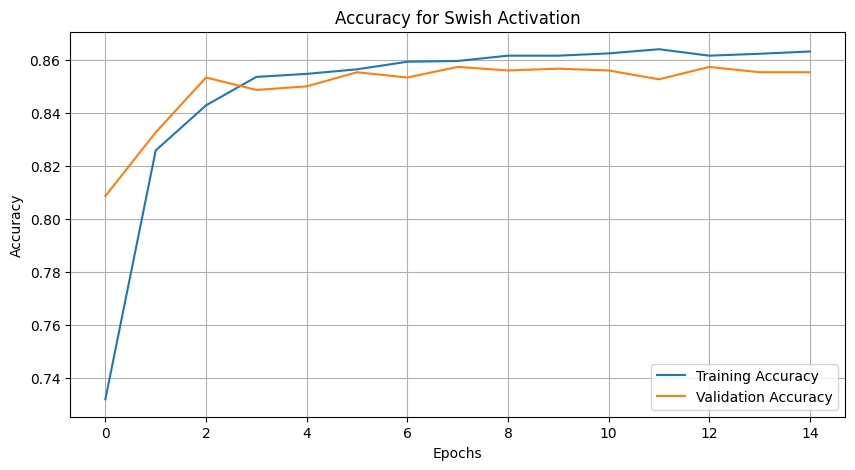

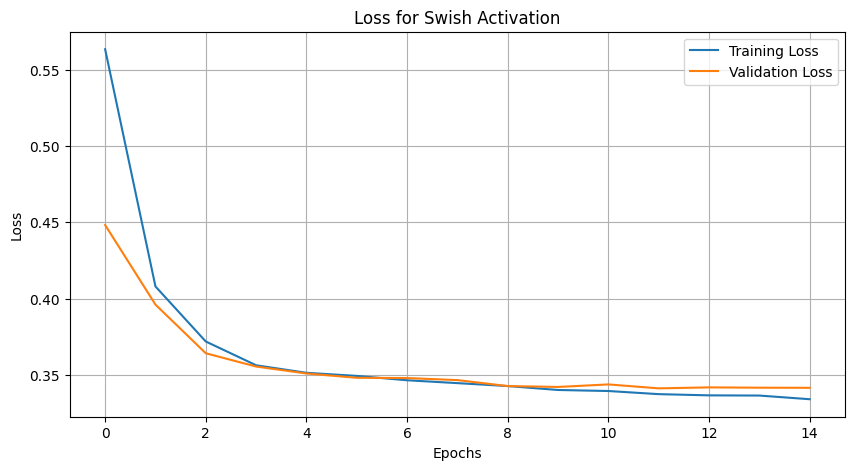

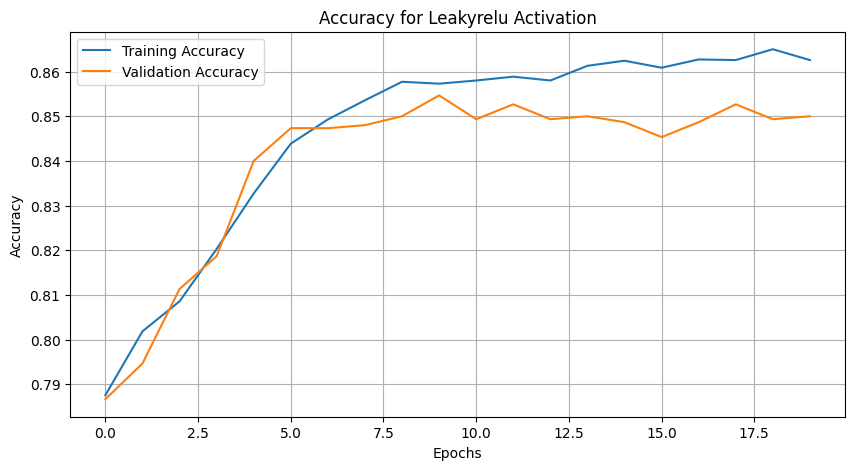

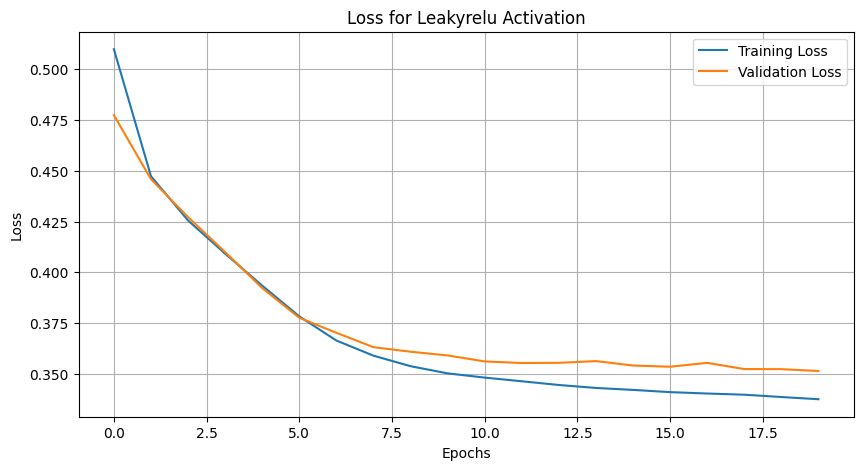

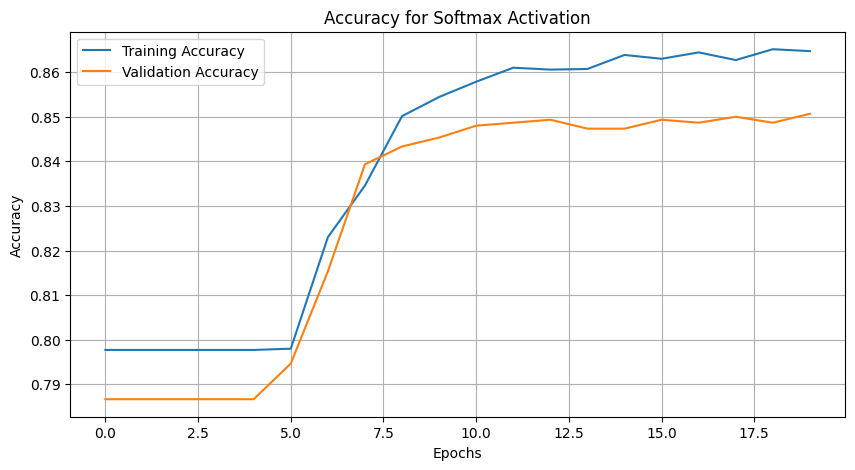

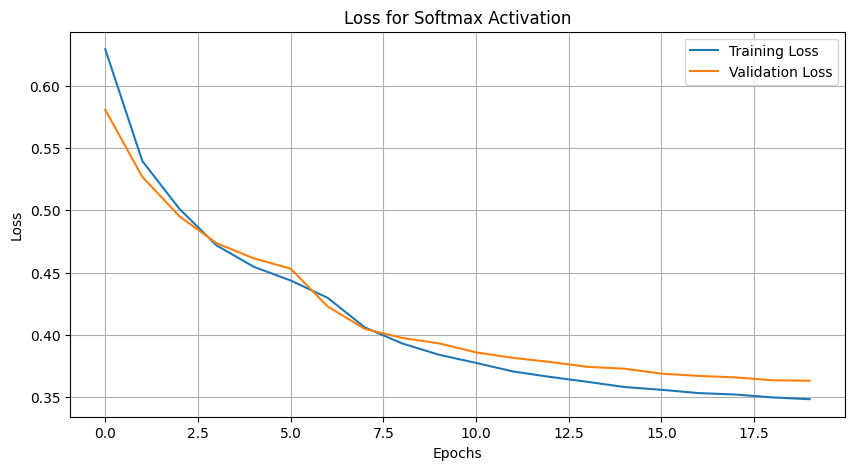

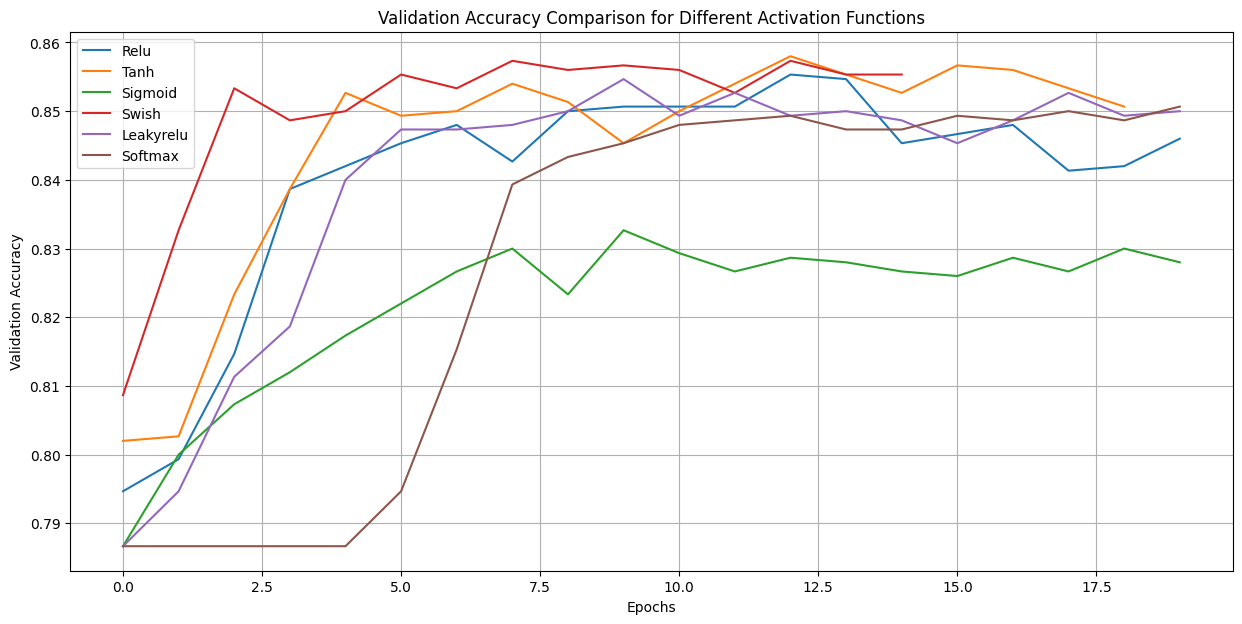

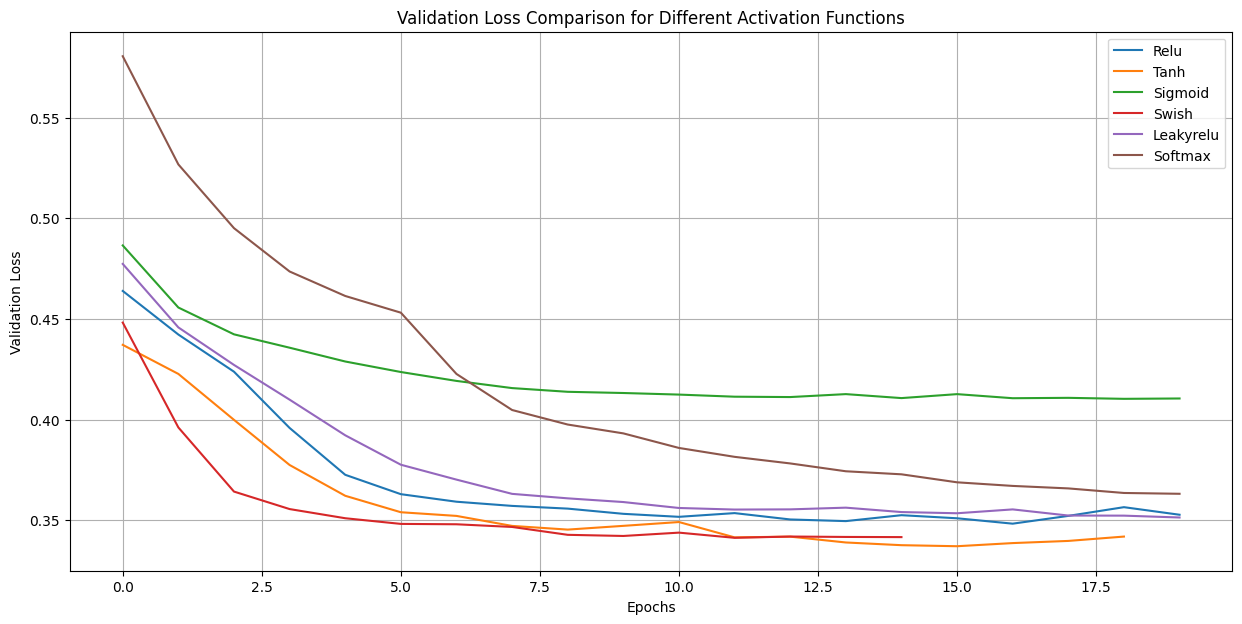

Comparative Metrics for Different Activation Functions:
Relu - Final Test Accuracy: 86.60%
Relu - Final Test MAE: 0.2018
Tanh - Final Test Accuracy: 87.40%
Tanh - Final Test MAE: 0.1995
Sigmoid - Final Test Accuracy: 85.33%
Sigmoid - Final Test MAE: 0.2401
Swish - Final Test Accuracy: 86.40%
Swish - Final Test MAE: 0.2069
Leakyrelu - Final Test Accuracy: 86.00%
Leakyrelu - Final Test MAE: 0.2098
Softmax - Final Test Accuracy: 85.93%
Softmax - Final Test MAE: 0.2208

The best performing activation function based on test accuracy is: Tanh
The activation function with the lowest MAE is: Tanh


In [3]:
# Loading the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Reading the dataset
dataset = pd.read_csv('/content/Bank_churn_modelling.csv')

# Preprocessing
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical variables (Geography and Gender)
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2])

# One-hot encoding for 'Geography' (column index 1)
transformer = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1])], remainder='passthrough')
X = transformer.fit_transform(X.tolist())
X = X.astype('float64')

# Avoiding dummy variable trap
X = X[:, 1:]

# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)  # 70% training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)  # 15% validation, 15% testing

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Helper function to create and train the model with specified activation functions
def create_model(activation_function='relu'):
    model = Sequential()

    # Add input layer
    model.add(Dense(units=16, input_dim=X_train.shape[1]))

    # Add hidden layers with specified activation function
    if activation_function == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.01))  # Correct usage of LeakyReLU as a layer
    elif activation_function == 'swish':
        model.add(Dense(units=16, activation=tf.keras.activations.swish))
    elif activation_function == 'softmax':
        model.add(Dense(units=16, activation='softmax'))  # For multi-class activation
    else:
        model.add(Dense(units=16, activation=activation_function))

    model.add(Dense(units=16))  # Second hidden layer
    if activation_function == 'leakyrelu':
        model.add(LeakyReLU(alpha=0.01))
    elif activation_function == 'swish':
        model.add(Dense(units=16, activation=tf.keras.activations.swish))
    elif activation_function == 'softmax':
        model.add(Dense(units=16, activation='softmax'))
    else:
        model.add(Dense(units=16, activation=activation_function))

    # Output layer with sigmoid activation for binary classification
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model with accuracy and MAE as metrics
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])

    return model

# Function to train and evaluate the model
def train_and_evaluate_model(model):
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluate the model on the test set
    test_metrics = model.evaluate(X_test, y_test)

    # Return model, history, and test metrics
    return model, history, test_metrics

# Compare models with different activation functions
activation_functions = ['relu', 'tanh', 'sigmoid', 'swish', 'leakyrelu', 'softmax']

# Dictionary to store results for comparative analysis
results = {}

# Loop through activation functions and create/train models
for activation in activation_functions:
    print(f"Training model with {activation} activation...")
    model = create_model(activation_function=activation)
    model, history, test_metrics = train_and_evaluate_model(model)

    # Store results
    results[activation] = {
        'history': history,
        'model': model,
        'final_train_accuracy': history.history['accuracy'][-1],
        'final_val_accuracy': history.history['val_accuracy'][-1],
        'final_test_accuracy': test_metrics[1],
        'final_test_mae': test_metrics[2]  # Test MAE
    }

# Plot accuracy and loss separately for each activation function
for activation in activation_functions:
    history = results[activation]['history'].history

    # Accuracy plot
    plt.figure(figsize=(10, 5))
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy for {activation.capitalize()} Activation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss plot
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Loss for {activation.capitalize()} Activation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combined accuracy plot for all activation functions
plt.figure(figsize=(15, 7))
for activation in activation_functions:
    plt.plot(results[activation]['history'].history['val_accuracy'], label=f'{activation.capitalize()}')
plt.title('Validation Accuracy Comparison for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Combined loss plot for all activation functions
plt.figure(figsize=(15, 7))
for activation in activation_functions:
    plt.plot(results[activation]['history'].history['val_loss'], label=f'{activation.capitalize()}')
plt.title('Validation Loss Comparison for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print comparative metrics
print("Comparative Metrics for Different Activation Functions:")
for activation in activation_functions:
    print(f"{activation.capitalize()} - Final Test Accuracy: {results[activation]['final_test_accuracy'] * 100:.2f}%")
    print(f"{activation.capitalize()} - Final Test MAE: {results[activation]['final_test_mae']:.4f}")

# Identify the best activation function based on accuracy
best_activation = max(activation_functions, key=lambda activation: results[activation]['final_test_accuracy'])
print(f"\nThe best performing activation function based on test accuracy is: {best_activation.capitalize()}")

# Identify the activation function with the lowest MAE
best_mae_activation = min(activation_functions, key=lambda activation: results[activation]['final_test_mae'])
print(f"The activation function with the lowest MAE is: {best_mae_activation.capitalize()}")
